In [2]:
import pandas as pd
import numpy as np

In [179]:
df=pd.read_csv('./train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [180]:
df['BsmtUnfSF'].isnull().sum()

0

In [181]:
from sklearn.preprocessing import LabelEncoder

#encoding string into binary
encoder=LabelEncoder()
df['MSZoning']= encoder.fit_transform(df['MSZoning'])
df['LotShape']= encoder.fit_transform(df['LotShape'])
df['LandContour']= encoder.fit_transform(df['LandContour'])
df['LotConfig']= encoder.fit_transform(df['LotConfig'])
df['Neighborhood']= encoder.fit_transform(df['Neighborhood'])
df['Condition1']= encoder.fit_transform(df['Condition1'])
df['Condition2']= encoder.fit_transform(df['Condition2'])
df['BldgType']= encoder.fit_transform(df['BldgType'])
df['HouseStyle']= encoder.fit_transform(df['HouseStyle'])
df['RoofStyle']= encoder.fit_transform(df['RoofStyle'])
df['Exterior1st']= encoder.fit_transform(df['Exterior1st'])
df['Exterior2nd']= encoder.fit_transform(df['Exterior2nd'])
df['MasVnrType']= encoder.fit_transform(df['MasVnrType'])
df['ExterQual']= encoder.fit_transform(df['ExterQual'])
df['Foundation']= encoder.fit_transform(df['Foundation'])
df['BsmtQual']= encoder.fit_transform(df['BsmtQual'])
df['BsmtExposure']= encoder.fit_transform(df['BsmtExposure'])
df['BsmtFinType1']= encoder.fit_transform(df['BsmtFinType1'])
df['HeatingQC']= encoder.fit_transform(df['HeatingQC'])
df['CentralAir']= encoder.fit_transform(df['CentralAir'])
df['Electrical']= encoder.fit_transform(df['Electrical'])
df['KitchenQual']= encoder.fit_transform(df['KitchenQual'])
df['GarageType']= encoder.fit_transform(df['GarageType'])
df['GarageFinish']= encoder.fit_transform(df['GarageFinish'])
df['PavedDrive']= encoder.fit_transform(df['PavedDrive'])
df['SaleType']= encoder.fit_transform(df['SaleType'])
df['SaleCondition']= encoder.fit_transform(df['SaleCondition'])

#filling values through mean
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

#dropping columns
df=df.drop(columns=['Street', 'Alley','Utilities','LandSlope','RoofMatl','MasVnrArea','ExterCond',
                    'BsmtCond','BsmtFinType2','BsmtFinSF1','BsmtFinSF2','Heating','2ndFlrSF',
                    'Functional','FireplaceQu','GarageQual','GarageCond','WoodDeckSF','OpenPorchSF',
                    'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC','Fence','MiscFeature',
                    'MiscVal','GarageYrBlt'], axis=1)
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,3,3,4,5,2,...,1,1,2,548,2,2,2008,8,4,208500
1,2,20,3,80.0,9600,3,3,2,24,1,...,1,1,2,460,2,5,2007,8,4,181500
2,3,60,3,68.0,11250,0,3,4,5,2,...,1,1,2,608,2,9,2008,8,4,223500
3,4,70,3,60.0,9550,0,3,0,6,2,...,5,2,3,642,2,2,2006,8,0,140000
4,5,60,3,84.0,14260,0,3,2,15,2,...,1,1,3,836,2,12,2008,8,4,250000


In [214]:
#assingning input label to and predicted label to y
X=df.drop(columns='SalePrice')
Y=df['SalePrice']
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,65.0,8450,3,3,4,5,2,...,0,1,1,2,548,2,2,2008,8,4
1,2,20,3,80.0,9600,3,3,2,24,1,...,1,1,1,2,460,2,5,2007,8,4
2,3,60,3,68.0,11250,0,3,4,5,2,...,1,1,1,2,608,2,9,2008,8,4
3,4,70,3,60.0,9550,0,3,0,6,2,...,1,5,2,3,642,2,2,2006,8,0
4,5,60,3,84.0,14260,0,3,2,15,2,...,1,1,1,3,836,2,12,2008,8,4


In [215]:
Y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [216]:
#splitting into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.2, random_state=42)


In [217]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge() 
param_grid = {'alpha': [50, 100, 200, 350, 500]}  
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X, Y)

# Get the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation R2 Score:", grid_search.best_score_)



Best Parameters: {'alpha': 100}
Best Cross-Validation R2 Score: 0.8075268140803488


In [218]:

model = Ridge(alpha=350)
model.fit(X_train, Y_train)



Ridge(alpha=350)

In [219]:
from sklearn.metrics import mean_squared_error

y_train_pred = model.predict(X_train)
train_rmse = mean_squared_error(Y_train, y_train_pred, squared=False)
print(f"Training RMSE is {train_rmse:.2f}")

y_test_pred = model.predict(X_test)
test_rmse = mean_squared_error(Y_test, y_test_pred, squared=False)
print(f"Testing RMSE is {test_rmse:.2f}")



Training RMSE is 32142.24
Testing RMSE is 35135.55


c:\Users\win\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\win\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


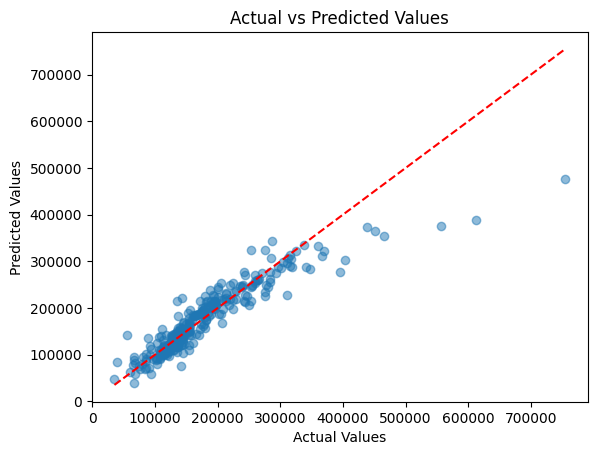

In [220]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.scatter(Y_test, y_test_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


In [221]:
test_data=pd.read_csv('./test.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [222]:
from sklearn.preprocessing import LabelEncoder

#encoding string into binary
encoder=LabelEncoder()
test_data['MSZoning']= encoder.fit_transform(test_data['MSZoning'])
test_data['LotShape']= encoder.fit_transform(test_data['LotShape'])
test_data['LandContour']= encoder.fit_transform(test_data['LandContour'])
test_data['LotConfig']= encoder.fit_transform(test_data['LotConfig'])
test_data['Neighborhood']= encoder.fit_transform(test_data['Neighborhood'])
test_data['Condition1']= encoder.fit_transform(test_data['Condition1'])
test_data['Condition2']= encoder.fit_transform(test_data['Condition2'])
test_data['BldgType']= encoder.fit_transform(test_data['BldgType'])
test_data['HouseStyle']= encoder.fit_transform(test_data['HouseStyle'])
test_data['RoofStyle']= encoder.fit_transform(test_data['RoofStyle'])
test_data['Exterior1st']= encoder.fit_transform(test_data['Exterior1st'])
test_data['Exterior2nd']= encoder.fit_transform(test_data['Exterior2nd'])
test_data['MasVnrType']= encoder.fit_transform(test_data['MasVnrType'])
test_data['ExterQual']= encoder.fit_transform(test_data['ExterQual'])
test_data['Foundation']= encoder.fit_transform(test_data['Foundation'])
test_data['BsmtQual']= encoder.fit_transform(test_data['BsmtQual'])
test_data['BsmtExposure']= encoder.fit_transform(test_data['BsmtExposure'])
test_data['BsmtFinType1']= encoder.fit_transform(test_data['BsmtFinType1'])
test_data['HeatingQC']= encoder.fit_transform(test_data['HeatingQC'])
test_data['CentralAir']= encoder.fit_transform(test_data['CentralAir'])
test_data['Electrical']= encoder.fit_transform(test_data['Electrical'])
test_data['KitchenQual']= encoder.fit_transform(test_data['KitchenQual'])
test_data['GarageType']= encoder.fit_transform(test_data['GarageType'])
test_data['GarageFinish']= encoder.fit_transform(test_data['GarageFinish'])
test_data['PavedDrive']= encoder.fit_transform(test_data['PavedDrive'])
test_data['SaleType']= encoder.fit_transform(test_data['SaleType'])
test_data['SaleCondition']= encoder.fit_transform(test_data['SaleCondition'])

#filling values through mean
test_data['LotFrontage'] = test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean())

#dropping columns
test_data=test_data.drop(columns=['Street', 'Alley','Utilities','LandSlope','RoofMatl','MasVnrArea','ExterCond',
                    'BsmtCond','BsmtFinType2','BsmtFinSF1','BsmtFinSF2','Heating','2ndFlrSF',
                    'Functional','FireplaceQu','GarageQual','GarageCond','WoodDeckSF','OpenPorchSF',
                    'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC','Fence','MiscFeature',
                    'MiscVal','GarageYrBlt'], axis=1)
test_data.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,3,3,4,12,1,...,0,1,2,1.0,730.0,2,6,2010,8,4
1,1462,20,3,81.0,14267,0,3,0,12,2,...,0,1,2,1.0,312.0,2,6,2010,8,4
2,1463,60,3,74.0,13830,0,3,4,8,2,...,1,1,0,2.0,482.0,2,3,2010,8,4
3,1464,60,3,78.0,9978,0,3,4,8,2,...,1,1,0,2.0,470.0,2,6,2010,8,4
4,1465,120,3,43.0,5005,0,1,4,22,2,...,0,1,1,2.0,506.0,2,1,2010,8,4


In [223]:
test_data['BsmtUnfSF']=test_data['BsmtUnfSF'].fillna(df['BsmtUnfSF'].mean())
test_data['TotalBsmtSF']=test_data['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean())
test_data['BsmtFullBath']=test_data['BsmtFullBath'].fillna(method='bfill')
test_data['BsmtHalfBath']=test_data['BsmtHalfBath'].fillna(method='bfill')
test_data['GarageCars']=test_data['GarageCars'].fillna(method='bfill')
test_data['GarageArea']=test_data['GarageArea'].fillna(df['GarageArea'].mean())



C:\Users\win\AppData\Local\Temp\ipykernel_5696\3868587477.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_data['BsmtFullBath']=test_data['BsmtFullBath'].fillna(method='bfill')
C:\Users\win\AppData\Local\Temp\ipykernel_5696\3868587477.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_data['BsmtHalfBath']=test_data['BsmtHalfBath'].fillna(method='bfill')
C:\Users\win\AppData\Local\Temp\ipykernel_5696\3868587477.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_data['GarageCars']=test_data['GarageCars'].fillna(method='bfill')


In [224]:
test_id=test_data['Id']
test_prediction=model.predict(test_data)

submission=pd.DataFrame({
    'Id': test_id,
    'SalePrice':test_prediction

})
submission.to_csv('submission1.csv', index=False)
print(f"Successfully created 'submission.csv' file")



Successfully created 'submission.csv' file
